# Part 1: Loading data and packages

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

text_data = pd.read_excel('textresponses_20200501.xlsx')
print("Total Free Responses:", len(text_data))

#The UNIVERSITY_KEY was created to introduced public or private classification
#We also had early plans to determine the grading adjustment and dorms decisions,
#however, the information varied across time and while a statement may have been 
#made the actions universities took were at time contradictory

university_key = pd.read_excel('University_Key.xlsx')

Total Free Responses: 857


# Part 2: Data processing

In [71]:
#MERGE free response data with institutional information

#only keeps responses with a std_inst response
text_updated = pd.merge(text_data,
                 university_key,
                 on='std_inst',
                 how='left')

text_updated.head(5)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,inst_country,institution,std_inst,pseudu_id,dummy_lang,CS_country,CS_inst,type_inst
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,United States of America (USA),NaN,NaN,1,0,NaN,NaN,NaN
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,United States of America (USA),University of California -- San Diego,"University of California, San Diego",2,0,United States of America (USA),"University of California, San Diego",Public
2,I have asthma so I've been very isolated and f...,Much worse than before,Much worse than before,N/A or Don't Know,Much worse than before,Much worse than before,Online classes,More information,Prepare for emergencies,NaN,United States of America (USA),UC San Diego,"University of California, San Diego",3,0,United States of America (USA),"University of California, San Diego",Public
3,NaN,Same as before,Same as before,Same as before,Much worse than before,Worse than before,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,NaN,Canada,McGill University,McGill University,4,0,Canada,McGill University,Public
4,"Dorms and residences aren't closed, but underg...",N/A or Don't Know,Same as before,Much worse than before,Much worse than before,Worse than before,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,NaN,United States of America (USA),Columbia University in the City of New York,Columbia University,5,0,United States of America (USA),Columbia University,Private


In [72]:
#now to drop un wanted columns
print("Total Responses with Univeristy Identified:", len(text_updated))
text_updated.isnull().sum()

Total Responses with Univeristy Identified: 857


basic_text        434
dis_healthcare     67
dis_internet       69
dis_academic       72
dis_social         73
dis_psych          73
inst_apprec       355
inst_wish         375
inst_help         435
inst_text         761
inst_country       96
institution       165
std_inst          165
pseudu_id           0
dummy_lang          0
CS_country        168
CS_inst           168
type_inst         168
dtype: int64

In [73]:
text_updated['final_country'] = np.where(text_updated['CS_country'].isnull(),text_updated['inst_country'],text_updated['CS_country'])

#now to drop values more values that don't mean much
text_updated = text_updated.drop(columns=['inst_country', 'institution', 'std_inst', 'CS_country'])
text_updated.head(5)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,pseudu_id,dummy_lang,CS_inst,type_inst,final_country
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,1,0,NaN,NaN,United States of America (USA)
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,2,0,"University of California, San Diego",Public,United States of America (USA)
2,I have asthma so I've been very isolated and f...,Much worse than before,Much worse than before,N/A or Don't Know,Much worse than before,Much worse than before,Online classes,More information,Prepare for emergencies,NaN,3,0,"University of California, San Diego",Public,United States of America (USA)
3,NaN,Same as before,Same as before,Same as before,Much worse than before,Worse than before,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,NaN,4,0,McGill University,Public,Canada
4,"Dorms and residences aren't closed, but underg...",N/A or Don't Know,Same as before,Much worse than before,Much worse than before,Worse than before,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,NaN,5,0,Columbia University,Private,United States of America (USA)


In [74]:
#Nans were filled with zeros for ease of processing.
#Note however no zero values were used in the following  visualizations
text_updated = text_updated.fillna(0)
text_updated.isnull().sum()

basic_text        0
dis_healthcare    0
dis_internet      0
dis_academic      0
dis_social        0
dis_psych         0
inst_apprec       0
inst_wish         0
inst_help         0
inst_text         0
pseudu_id         0
dummy_lang        0
CS_inst           0
type_inst         0
final_country     0
dtype: int64

In [75]:
X=({"N/A or Don't Know": 0, 'Much worse than before':1, 'Worse than before':2,
       'Same as before':3, 'Better than before':4,
       'Much better than before':5})


text_updated['dis_healthcare'] = text_updated['dis_healthcare'].replace(X)
text_updated['dis_internet'] = text_updated['dis_internet'].replace(X)
text_updated['dis_academic'] = text_updated['dis_academic'].replace(X)
text_updated['dis_social'] = text_updated['dis_social'].replace(X)
text_updated['dis_psych'] = text_updated['dis_psych'].replace(X)

# Free-Response Visualizations
Is there a difference in the disruption scores for public vs. private?

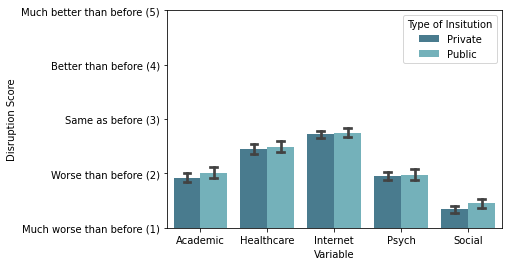

Well-being means by category and by institution type
Academic Public:  2.02
Academic Private:  1.92
Healthcare Public:  2.49
Healthcare Private:  2.45
Internet Public:  2.75
Internet Private:  2.72
Psychological Public:  1.97
Psychological Private:  1.95
Social Public:  1.45
Social Private:  1.34

Well-being means by category
Academic:  value    1.97
dtype: float64
Healthcare:  value    2.49
dtype: float64
Internet:  value    2.73
dtype: float64
Psychological:  value    1.99
dtype: float64
Social:  value    1.41
dtype: float64


In [76]:
final_data = text_updated

h = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.type_inst != 'Unknown')]
hm = hm[(hm.type_inst != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'type_inst':'Type of Insitution'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Type of Insitution', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)

plt.savefig('pubvpri_barplot.png', bbox_inches='tight')
plt.show()

#the following shows the well-being mean for each category by institution type
print('Well-being means by category and by institution type')
print('Academic Public: ', round(a_public.mean(),2))
print('Academic Private: ', round(a_private.mean(),2))
print('Healthcare Public: ', round(h_public.mean(),2))
print('Healthcare Private: ', round(h_private.mean(),2))
print('Internet Public: ', round(i_public.mean(),2))
print('Internet Private: ', round(i_private.mean(),2))
print('Psychological Public: ', round(p_public.mean(),2))
print('Psychological Private: ', round(p_private.mean(),2))
print('Social Public: ', round(s_public.mean(),2))
print('Social Private: ', round(s_private.mean(),2))

#the following shows the well-being mean by category
print()
print('Well-being means by category')
a = a[(a.value != 0)]
print('Academic: ', round(a.mean(),2))
h = h[(h.value != 0)]
print('Healthcare: ', round(h.mean(),2))
i = i[(i.value != 0)]
print('Internet: ', round(i.mean(),2))
p = p[(p.value != 0)]
print('Psychological: ', round(p.mean(),2))
s = s[(s.value != 0)]
print('Social: ', round(s.mean(),2))

In [77]:
text_updated['type_inst'].value_counts()

Private    439
Public     248
0          168
Unknown      2
Name: type_inst, dtype: int64

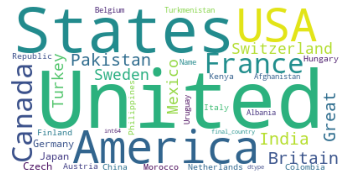

In [78]:
from wordcloud import WordCloud
text = text_updated['final_country'].value_counts()

wordcloud = WordCloud(background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('country_word_cloud.png', bbox_inches='tight', palette="GnBu_d")
plt.show()

# Additional Visualizations (below) were tried before settling on the two above

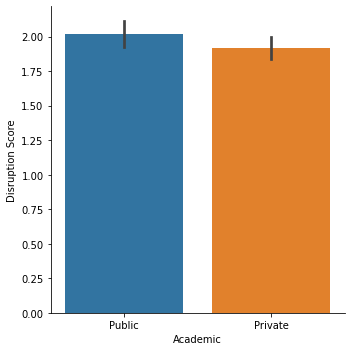

In [79]:
#####Figures, figures, figures
#Is there a difference in the disruption scores for public vs. private?
#x-axis 5 variables
#y is the mean of each excluding 0 which are blanks and NA
#split by public vs. private

aca_data  = text_updated[text_updated.type_inst != 0]
aca_data  = text_updated[text_updated.dis_academic != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_academic', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=aca_data)
ax.set(xlabel='Academic', ylabel='Disruption Score')

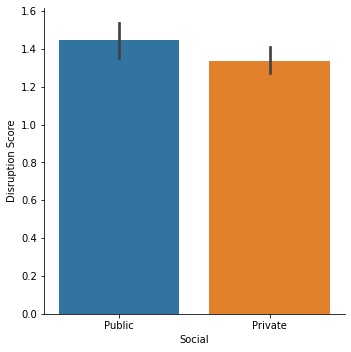

In [80]:
soc_data  = text_updated[text_updated.type_inst != 0]
soc_data  = text_updated[text_updated.dis_social != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_social', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=soc_data)
ax.set(xlabel='Social', ylabel='Disruption Score')

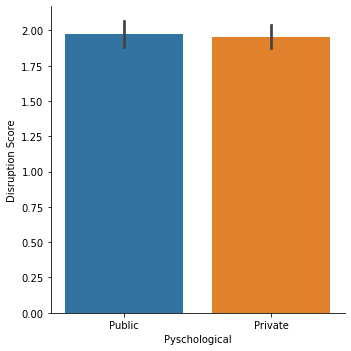

In [81]:
psych_data  = text_updated[text_updated.type_inst != 0]
psych_data  = text_updated[text_updated.dis_psych != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_psych', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=psych_data)
ax.set(xlabel='Pyschological', ylabel='Disruption Score')

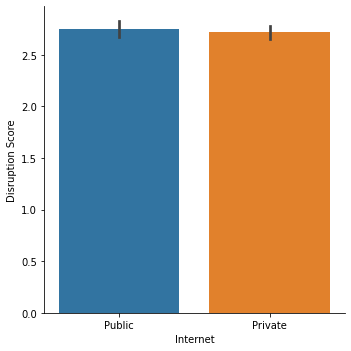

In [82]:
internet_data  = text_updated[text_updated.type_inst != 0]
internet_data  = text_updated[text_updated.dis_internet != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_internet', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=internet_data)
ax.set(xlabel='Internet', ylabel='Disruption Score')

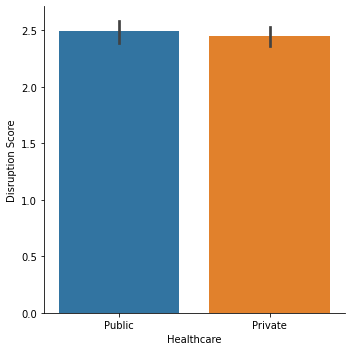

In [83]:
health_data  = text_updated[text_updated.type_inst != 0]
health_data  = text_updated[text_updated.dis_healthcare != 0]
ax = sns.catplot(x='type_inst', 
                 y='dis_healthcare', 
                 order=["Public", "Private"],
                 kind='bar',
                 data=health_data)
ax.set(xlabel='Healthcare', ylabel='Disruption Score')

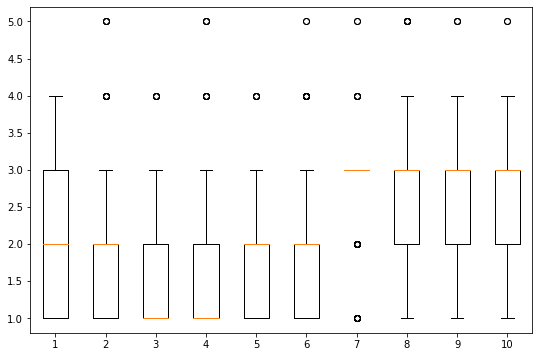

In [84]:
a_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_academic'] >0), 'dis_academic']
a_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_academic'] >0), 'dis_academic']
s_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_social'] >0), 'dis_social']
s_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_social'] >0), 'dis_social']
p_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_psych'] >0), 'dis_psych']
p_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_psych'] >0), 'dis_psych']
i_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_internet'] >0), 'dis_internet']
i_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_internet'] >0), 'dis_internet']
h_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']
h_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']

values = [a_public, a_private, s_public, s_private, p_public, p_private, i_public, i_private,  h_public, h_private]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(values)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

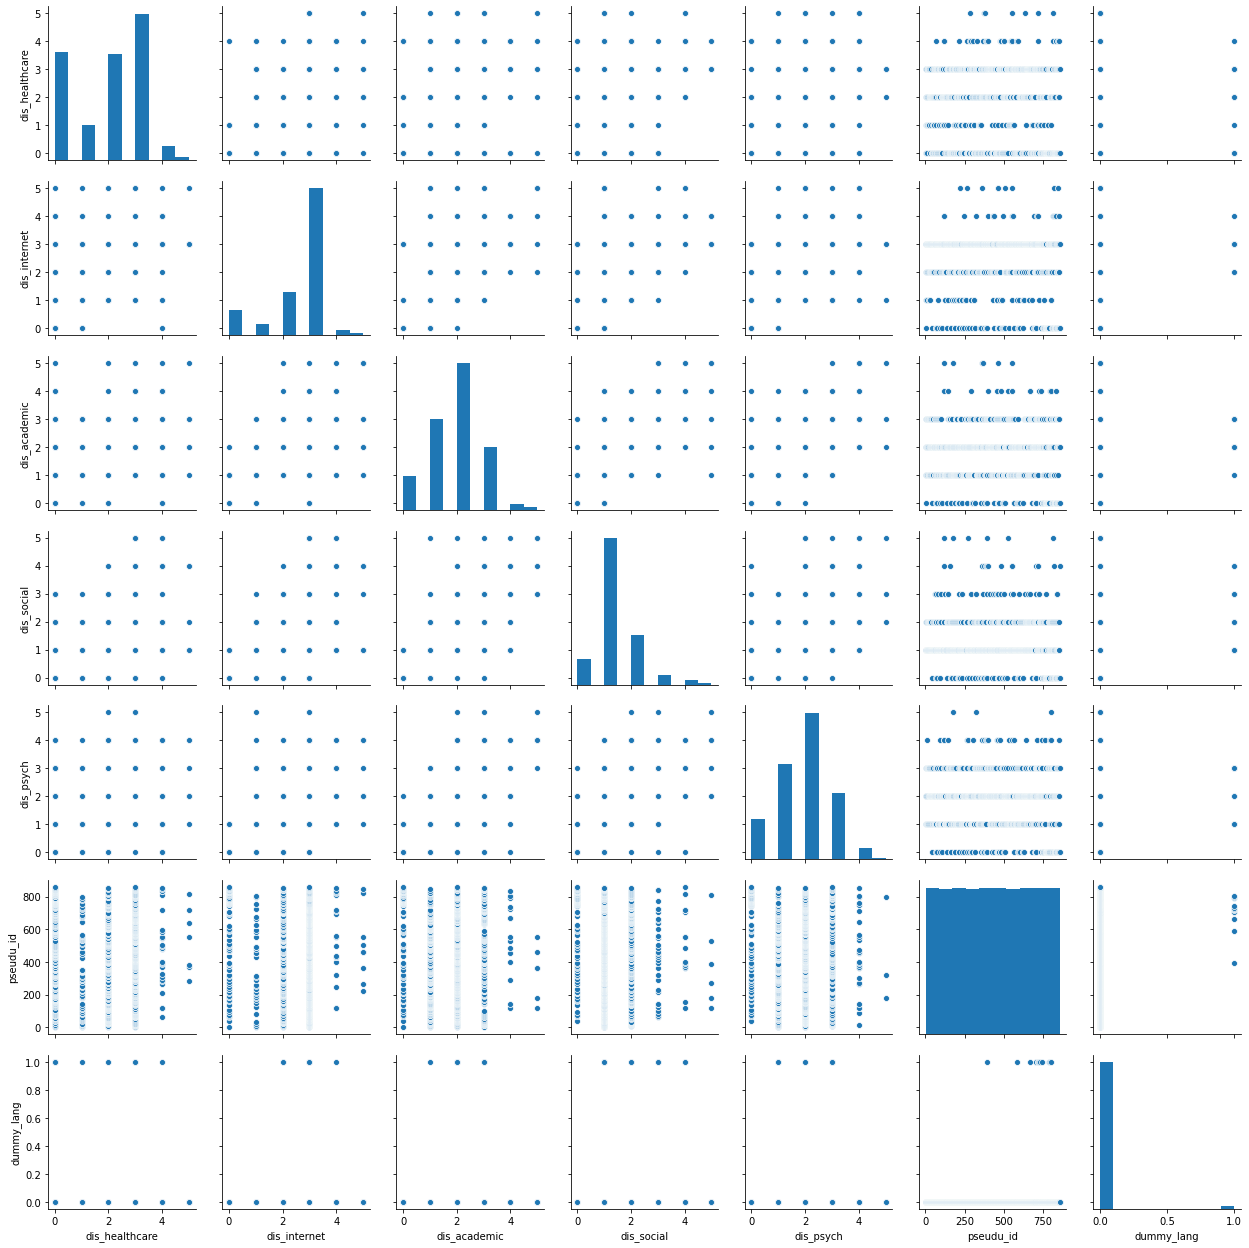

In [85]:
# Basic correlogram
sns.pairplot(text_updated)